In [1]:
#Luís Filipe Silva Forti - 14592348
#Miguel Rodrigues Fonseca - 14682196

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
#Abre o arquivo
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')

#Remove linhas com dados inúteis
df = df[df.User_Score != "tbd"] #valores indefinidos
df = df[df.Critic_Score != "tbd"] #valores indefinidos
df = df.dropna() #Valores inválidos

#Remove 3 dados que estavam atrapalhando muito a visualização dos boxplots
df = df[df.NA_Sales < 41]
df = df[df.JP_Sales < 6.4]
df = df[df.Other_Sales < 10.5]

# Regressão polinomial

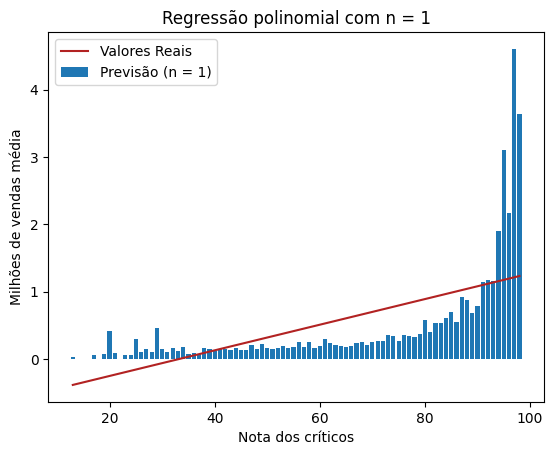

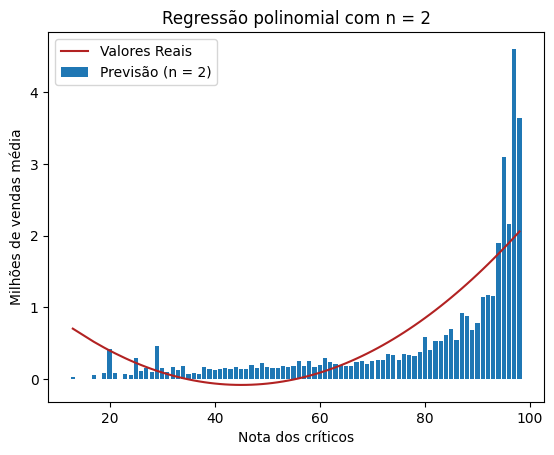

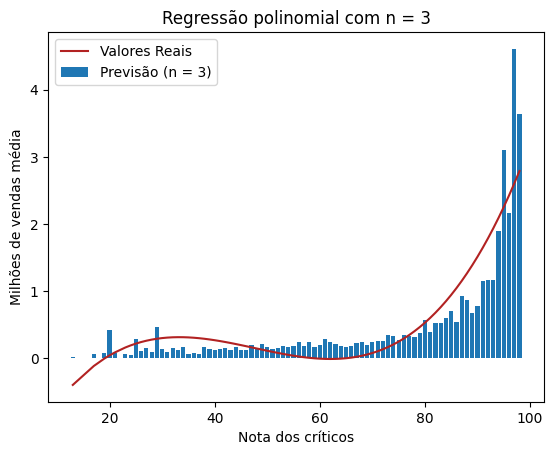

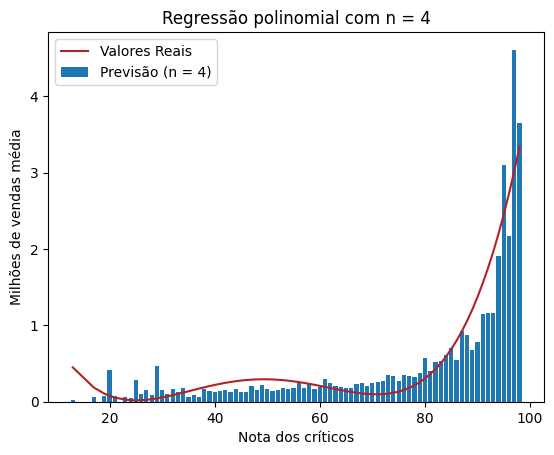

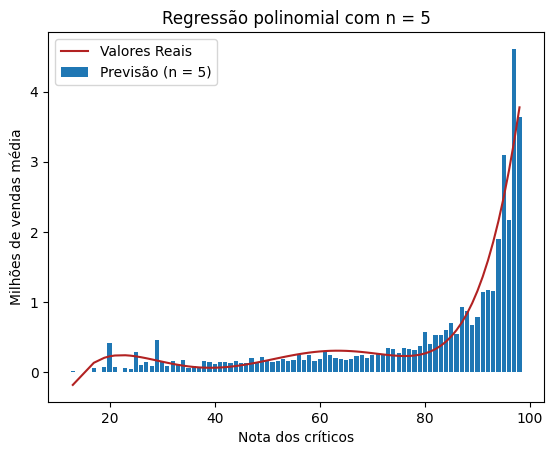

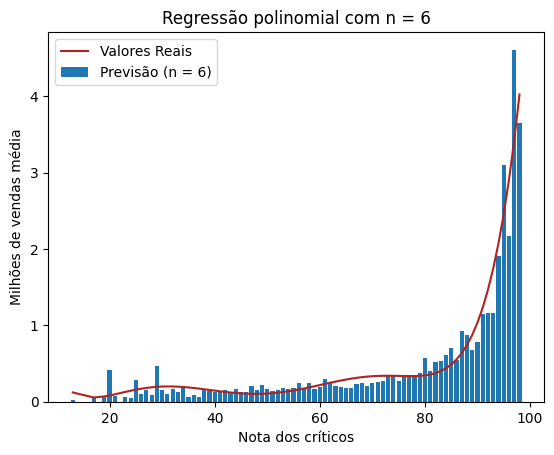

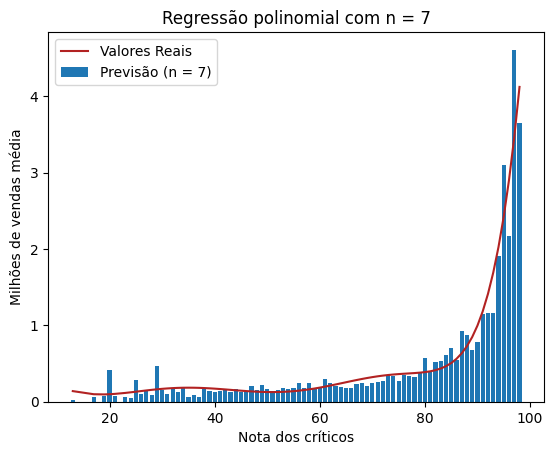

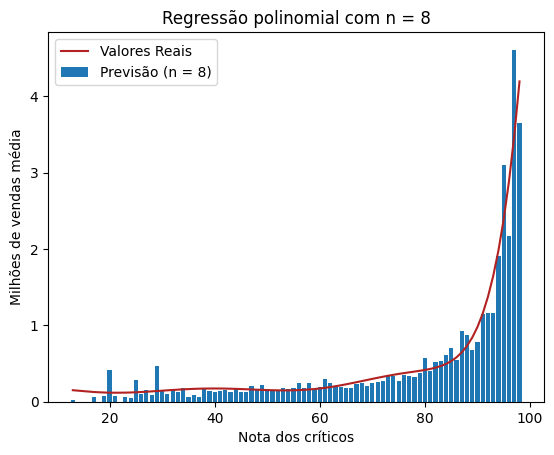

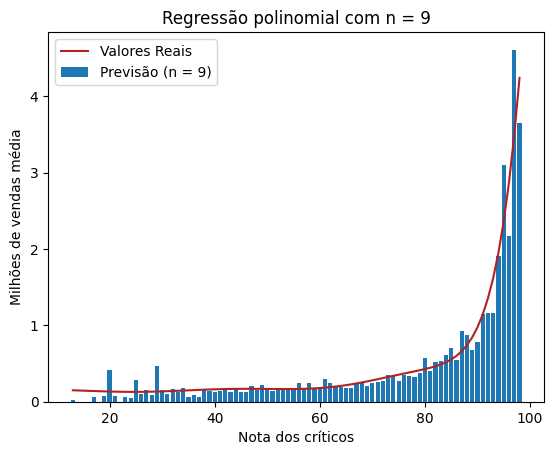

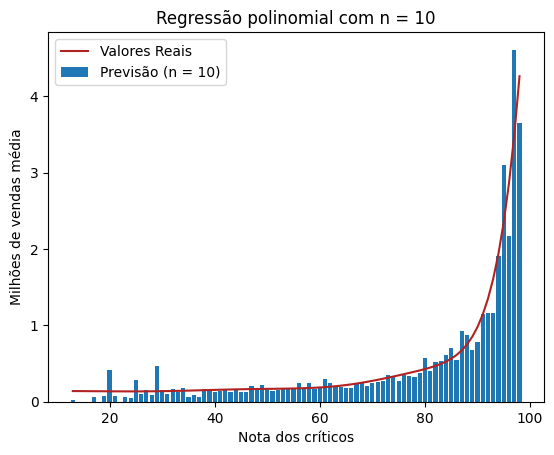

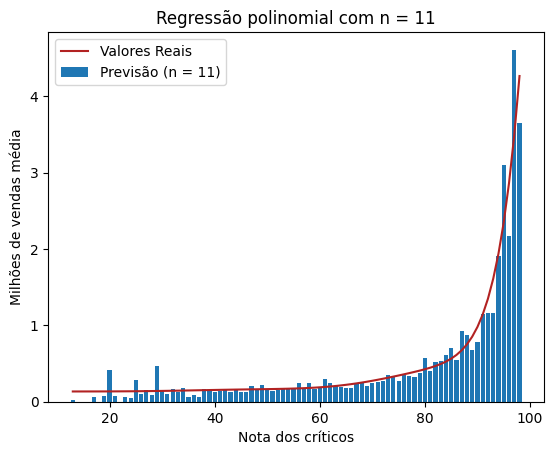

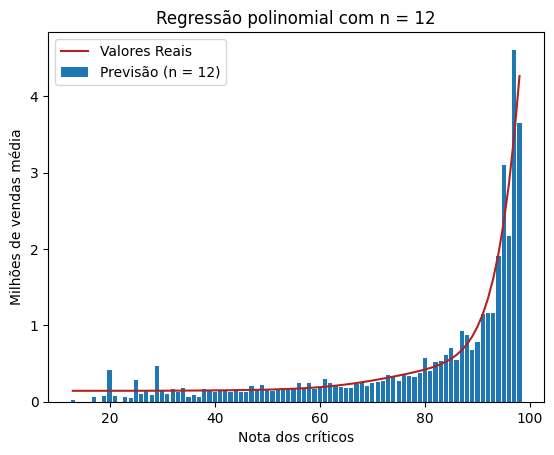

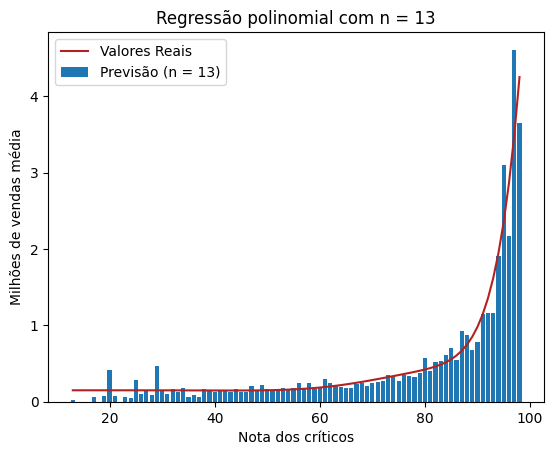

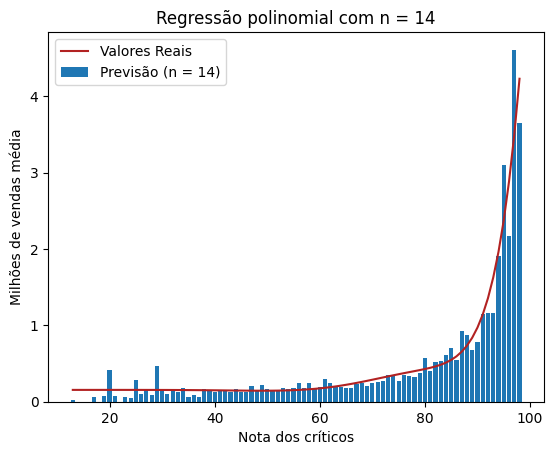

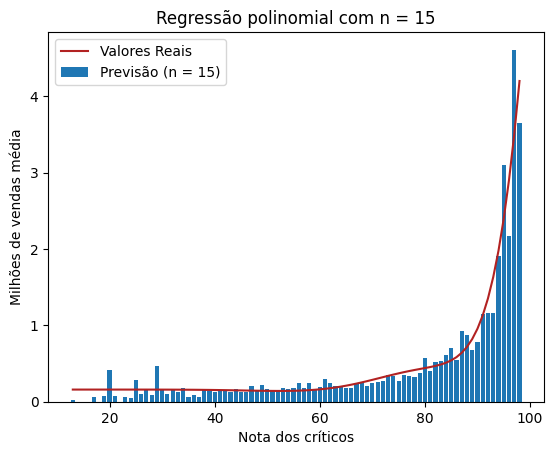

In [40]:
#Separa as colunas desejadas
pontCriticos = df.filter(['Name', 'Critic_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

#Ordena por pontuação dos críticos
pontCriticos = pontCriticos.sort_values("Critic_Score", ascending=True)
pontCriticos = pontCriticos.reset_index()

#Para a função fit_transform funcionar adequadamente ele precisa que X seja um array feito de arrays
X = [[val] for val in pontCriticos.Critic_Score.unique()]
#Para calcular as médias de cada avaliação
mediaVendasNA = np.zeros(len(X))

#Para cada pontuação
for pont in X:
    valNA = pontCriticos[pontCriticos.Critic_Score == pont[0]].NA_Sales
    mediaVendasNA[X.index(pont)] = np.sum(valNA)/valNA.size

#print(pontCriticos)
#print(X)

n = [val for val in range(1, 16)]
for i in n:
    pr = PolynomialFeatures(degree = i)
    X_poly = pr.fit_transform(X)
    lr_2 = LinearRegression()
    lr_2.fit(X_poly, mediaVendasNA)
    
    plt.bar(pontCriticos.Critic_Score.unique(), mediaVendasNA)
    plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
    plt.title('Regressão polinomial com n = ' + str(i))
    plt.xlabel('Nota dos críticos')
    plt.ylabel('Milhões de vendas média')
    plt.legend(['Valores Reais', 'Previsão (n = ' + str(i) + ')'], loc='best', facecolor='white')
    plt.show()